In [1]:
import numpy as np 
import pandas as pd
import os 
import librosa 
import wave
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import rmsprop

Using TensorFlow backend.


In [2]:
def extract_mfcc(wav_file_name):
    y, sr = librosa.load(wav_file_name,duration=3
                                  ,offset=0.5)
    mfccs = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T,axis=0)
    
    return mfccs

In [3]:
radvess_speech_labels = []
ravdess_speech_data = []
for dirname, _, filenames in os.walk('/kaggle/input/ravdess-emotional-speech-audio/'):
    for filename in filenames:
        
        radvess_speech_labels.append(int(filename[7:8]) - 1) 
        wav_file_name = os.path.join(dirname, filename)
        ravdess_speech_data.append(extract_mfcc(wav_file_name)) 
        
print("Finish Loading the Dataset")

Finish Loading the Dataset


In [4]:
ravdess_speech_data_array = np.asarray(ravdess_speech_data) 
ravdess_speech_label_array = np.array(radvess_speech_labels)
ravdess_speech_label_array.shape

labels_categorical = to_categorical(ravdess_speech_label_array) # converts a class vector (integers) to binary class matrix
labels_categorical.shape

(2880, 8)

In [5]:
ravdess_speech_data_array.shape

(2880, 40)

In [6]:
x_train,x_test,y_train,y_test= train_test_split(np.array(ravdess_speech_data_array),labels_categorical, test_size=0.20, random_state=9)

In [7]:
# Split the training, validating, and testing sets
number_of_samples = ravdess_speech_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [8]:
# Define the LSTM model
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(128, return_sequences=False, input_shape=(40, 1)))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))
    
    # Configures the model for training
    model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])
    return model

In [9]:
w = np.expand_dims(ravdess_speech_data_array[:training_samples],-1)

In [10]:
w.shape

(2304, 40, 1)

In [11]:
### train using LSTM model
model_A = create_model_LSTM()
history = model_A.fit(np.expand_dims(ravdess_speech_data_array[:training_samples],-1), labels_categorical[:training_samples], validation_data=(np.expand_dims(ravdess_speech_data_array[training_samples:training_samples+validation_samples], -1), labels_categorical[training_samples:training_samples+validation_samples]), epochs=100, shuffle=True)

Train on 2304 samples, validate on 288 samples
Epoch 1/100
2304/2304 [==============================] - 5s 2ms/step - loss: 2.0641 - accuracy: 0.1593 - val_loss: 2.0541 - val_accuracy: 0.1632
Epoch 2/100
2304/2304 [==============================] - 3s 1ms/step - loss: 2.0113 - accuracy: 0.2057 - val_loss: 1.9509 - val_accuracy: 0.1771
Epoch 3/100
2304/2304 [==============================] - 3s 1ms/step - loss: 1.9543 - accuracy: 0.2279 - val_loss: 1.9013 - val_accuracy: 0.2639
Epoch 4/100
2304/2304 [==============================] - 3s 1ms/step - loss: 1.9170 - accuracy: 0.2504 - val_loss: 1.8742 - val_accuracy: 0.2500
Epoch 5/100
2304/2304 [==============================] - 3s 1ms/step - loss: 1.8945 - accuracy: 0.2591 - val_loss: 1.8825 - val_accuracy: 0.2083
Epoch 6/100
2304/2304 [==============================] - 3s 1ms/step - loss: 1.8491 - accuracy: 0.2804 - val_loss: 1.8158 - val_accuracy: 0.2812
Epoch 7/100
2304/2304 [==============================] - 3s 1ms/step - loss: 1.8204

Epoch 57/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.7178 - accuracy: 0.7292 - val_loss: 0.7194 - val_accuracy: 0.7396
Epoch 58/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.6964 - accuracy: 0.7418 - val_loss: 0.6767 - val_accuracy: 0.7326
Epoch 59/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.6327 - accuracy: 0.7578 - val_loss: 0.6831 - val_accuracy: 0.7674
Epoch 60/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.7257 - accuracy: 0.7335 - val_loss: 0.8149 - val_accuracy: 0.7222
Epoch 61/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.7054 - accuracy: 0.7444 - val_loss: 0.6955 - val_accuracy: 0.7431
Epoch 62/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.6881 - accuracy: 0.7665 - val_loss: 0.7230 - val_accuracy: 0.7326
Epoch 63/100
2304/2304 [==============================] - 3s 1ms/step - loss: 0.5915 - accuracy: 0.7873 - val_loss: 0.5293 -

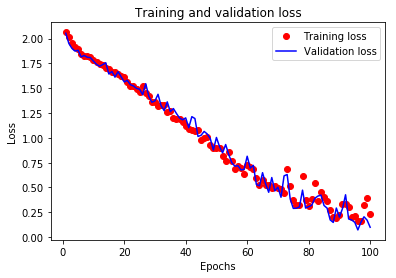

In [12]:
### loss plots using LSTM model
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'ro', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

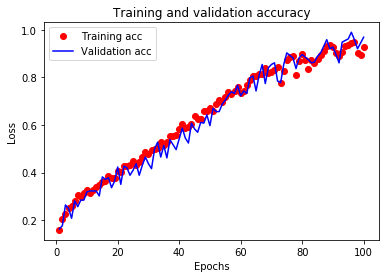

In [13]:
### accuracy plots using LSTM model
plt.clf()                                                

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

*  **(evaluate function): Returns the loss value & metrics values for the model in test mode.**

In [14]:
### evaluate using model A
model_A.evaluate(np.expand_dims(ravdess_speech_data_array[training_samples + validation_samples:], -1), labels_categorical[training_samples + validation_samples:])

288/288 [==============================] - 0s 324us/step


[0.13654450037413174, 0.9548611044883728]

* **  Save the weights of the model as a HDF5 file **

In [15]:
model_A.save_weights("Model_LSTM.h5")

In [35]:
path_ = '../input/ravdess-emotional-speech-audio/Actor_01/03-01-01-01-01-02-01.wav'

In [36]:
import IPython.display as ipd
#ipd.Audio(path_)

In [37]:
a = extract_mfcc(path_)

In [38]:
a.shape

(40,)

In [39]:
a1 = np.asarray(a)

In [40]:
a1.shape

(40,)

In [41]:
q = np.expand_dims(a1,-1)

In [42]:
qq = np.expand_dims(q,0)

In [43]:
qq.shape

(1, 40, 1)

In [44]:
pred = model_A.predict(qq)

In [45]:
pred

array([[3.7957832e-01, 6.2034619e-01, 2.8696613e-11, 7.7807899e-06,
        8.2999797e-08, 4.7889338e-05, 1.9792991e-05, 1.3631976e-09]],
      dtype=float32)

In [46]:
preds=pred.argmax(axis=1)
preds

array([1])

In [ ]:
00 = neutral, 01 = calm, 02 = happy, 03 = sad, 04 = angry, 05 = fearful, 06 = disgust, 07 = surprised